# Introduction to Natural Language Processing

### Word operations & Feature extraction using Pandas, Sklearn

# PYTHON BASICS

## Arrays and Hash Maps are called Lists and Dictionaries 

What we commonly know as an array is called in Python a list. Similarly we have also a dictionary as data structure which are like lookup tables. One interesting aspect here is that we can mix several types into this structures.

In [9]:
my_string = "TEST ABC"
my_integer = 42
my_slice = my_string[:3]
my_float = 3.5


In [10]:
my_list = [my_string, my_integer, my_slice, my_float]


In [11]:
print(my_list)


['TEST ABC', 42, 'TES', 3.5]


In [12]:
another_list = my_string.split(" ") + my_list


In [13]:
print(another_list)


['TEST', 'ABC', 'TEST ABC', 42, 'TES', 3.5]


In [14]:
my_list.append(my_string.split(" "))


In [15]:
print(my_list)


['TEST ABC', 42, 'TES', 3.5, ['TEST', 'ABC']]


In [20]:
my_dict = {"a": 1, "b": 2, "c": 3, "d": my_list}


In [21]:
print(my_dict)


{'a': 1, 'b': 2, 'c': 3, 'd': ['TEST ABC', 42, 'TES', 3.5, ['TEST', 'ABC']]}


## Defining Functions

Let's say that we want a function to return always the last letter of a word in a string

In [38]:
this_string = "Introduction to Natural Language Processing"


In [21]:
def extract_last_letter(any_string):
    letter_list = [word[-1] for word in any_string.split(" ")]
    return letter_list


In [22]:
my_letter_list = extract_last_letter(this_string)


In [23]:
print(my_letter_list)


['n', 'o', 'l', 'e', 'g']


Create a function that returns every word in a string in lowercase and another one for uppercase

**Hint:** explore the funtions `upper` and `lower`

In [24]:
def return_lower(any_string):
    return any_string.lower()


In [25]:
print(return_lower(this_string))


introduction to natural language processing


In [26]:
def return_upper(any_string):
    return any_string.upper()


In [27]:
print(return_upper(this_string))


INTRODUCTION TO NATURAL LANGUAGE PROCESSING


## Iterating

There are several ways of iterating, you can use the `enumerate()` method or you can combine `for`, `range` and the 
`length` of your type. Please make sure that you use meaningful names here. 

Let's look at an example let's create a function that returns a mapping of each word in a string and it's index

In [30]:
def map_word_to_index(any_string):
    word_list = any_string.split(" ")
    my_mapping = {}
    for index in range(len(word_list)):
        my_mapping[word_list[index]] = index
    return my_mapping


In [31]:
print(map_word_to_index(this_string))


{'Introduction': 0, 'to': 1, 'Natural': 2, 'Language': 3, 'Processing': 4}


Now: try to explore the `enumerate()` method and write a similar function to return a list with only words with *even* indexes.

In [45]:
def extract_even_words(any_string):
    words_list = any_string.split(" ")
    return [words_list[i] for i, word in enumerate(words_list) if i % 2 == 0]


In [46]:
print(extract_even_words(this_string))


['Introduction', 'Natural', 'Processing']


## Reading text files

We want to know is how to read files in Python. There are several posibilities of using `open()`, which is the function to work with files.

In [2]:
with open("tweet.txt", "r", encoding="utf-8") as my_file:
    for line in my_file:
        print(line)
        print("----")


Play Services bittet User um Erlaubnis für:\n\n* Before starting to scan for and broadcast beacons.\n* Before providing user keys to the app for uploading to the […] server once the user has been positively diagnosed with COVID-19.\n\n#CoronaApp dürfte das nicht verhindern können!

----
GPT-4 and its ilk are awesome for rapid prototyping and one-offs, but at the end of the day, enterprises will deploy far smaller distilled models in production.

----
Are you wondering how large language models like ChatGPT and InstructGPT actually work? One of the secret ingredients is RLHF - Reinforcement Learning from Human Feedback.
----


## Tokenization

In [8]:
from urllib.request import urlopen
import re

little_women_url = "http://www.gutenberg.org/cache/epub/514/pg514.txt"


def read_url(url):
    return re.sub("\\s+", " ", urlopen(url).read().decode())


text = read_url(little_women_url)


In [9]:
text[:100]


'\ufeffThe Project Gutenberg eBook of Little Women, by Louisa May Alcott This eBook is for the use of anyo'

In [10]:
print("length of dataset in characters: ", len(text))


length of dataset in characters:  1021628


In [11]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print("".join(chars))
print(vocab_size)


 !"#$%&'()*,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZ[]_abcdefghijklmnopqrstuvwxyzà—‘’“”﻿
90


In [12]:
s_to_i = {ch: i for i, ch in enumerate(chars)}
i_to_s = {i: ch for i, ch in enumerate(chars)}
encode = lambda s: [s_to_i[c] for c in s]
decode = lambda l: "".join([i_to_s[i] for i in l])


In [15]:
print(encode("introduction to"))
print(decode(encode("introduction to")))


[65, 70, 76, 74, 71, 60, 77, 59, 76, 65, 71, 70, 0, 76, 71]
introduction to


In [16]:
# let's encode the text dataset and save it into a torch.Tensor
import torch

data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000])


torch.Size([1021628]) torch.int64
tensor([89, 47, 64, 61,  0, 43, 74, 71, 66, 61, 59, 76,  0, 34, 77, 76, 61, 70,
        58, 61, 74, 63,  0, 61, 29, 71, 71, 67,  0, 71, 62,  0, 39, 65, 76, 76,
        68, 61,  0, 50, 71, 69, 61, 70, 11,  0, 58, 81,  0, 39, 71, 77, 65, 75,
        57,  0, 40, 57, 81,  0, 28, 68, 59, 71, 76, 76,  0, 47, 64, 65, 75,  0,
        61, 29, 71, 71, 67,  0, 65, 75,  0, 62, 71, 74,  0, 76, 64, 61,  0, 77,
        75, 61,  0, 71, 62,  0, 57, 70, 81, 71, 70, 61,  0, 57, 70, 81, 79, 64,
        61, 74, 61,  0, 65, 70,  0, 76, 64, 61,  0, 48, 70, 65, 76, 61, 60,  0,
        46, 76, 57, 76, 61, 75,  0, 57, 70, 60,  0, 69, 71, 75, 76,  0, 71, 76,
        64, 61, 74,  0, 72, 57, 74, 76, 75,  0, 71, 62,  0, 76, 64, 61,  0, 79,
        71, 74, 68, 60,  0, 57, 76,  0, 70, 71,  0, 59, 71, 75, 76,  0, 57, 70,
        60,  0, 79, 65, 76, 64,  0, 57, 68, 69, 71, 75, 76,  0, 70, 71,  0, 74,
        61, 75, 76, 74, 65, 59, 76, 65, 71, 70, 75,  0, 79, 64, 57, 76, 75, 71,
      

In [47]:
import tiktoken

enc = tiktoken.encoding_for_model("gpt-4")


In [21]:
enc.n_vocab


100277

In [22]:
enc.encode("introduction to")


[396, 17158, 311]

In [28]:
enc.decode([396, 17158, 311])


'introduction to'

In [ ]:
# enc.encode("introduce to")


## Lemmatization

In [50]:
from nltk.stem import WordNetLemmatizer

import nltk

nltk.download("wordnet")
nltk.download("omw-1.4")


[nltk_data] Downloading package wordnet to /Users/faizan/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/faizan/nltk_data...


True

In [51]:
lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("worst"))
print(lemmatizer.lemmatize("born"))


worst
born


In [62]:
# Does it work well?
print(lemmatizer.lemmatize("worst", pos="a"))
print(lemmatizer.lemmatize("born", pos="v"))


bad
bear


## Stemming

In [59]:
from nltk.stem import PorterStemmer


In [60]:
stemmer = PorterStemmer()
stemmer.stem("helping")


'help'

## Pandas

Take the survey.csv file as an example ...

In [53]:
import pandas as pd


In [61]:
# Read the CSV file
df = pd.read_csv("Survey.csv", sep=";")
df.head(10)


,Alias,Degree,Study Program,Experience_Python,Experience_Programming,Course,City
0,Florian,MSc.,Computer Science,5,5,ML & AI,Bonn
1,Daria,MSc.,Computer Science,3,3,NaN,Bonn
2,Behzad,MSc.,Computer Science,5,5,ML & AI,Bonn
3,Jakob,MSc.,Computer Science,4,4,ML,Bonn
4,Max,MSc.,Computer Science,4,3,NaN,Bonn
5,Nico,BSc.,Mathematics,4,4,NaN,Cologne
6,Syed Mehdi,MSc.,Computer Science,3,5,NaN,Bonn
7,Arwin,BSc.,Computer Science,4,3,NaN,Cologne
8,Arthi,BSc.,Informatik,1,3,NaN,Bonn
9,Ruben,MSc.,Computer Science,2,3,NaN,Bonn


## Pandas Series

Pandas has two data structures that we will consider in this class, `Series` and `DataFrame`. Let's take a closer look at `Series`. At first glance, it's like playing around with a `list`. We already know what a list is and why this data structure is relevant. `Series` is also very similar, but Pandas allows index naming, making everything much easier to read.

In [43]:
list1 = "This is the first document".split(" ")


In [44]:
print(list1)


['This', 'is', 'the', 'first', 'document']


In [45]:
my_series = pd.Series(list1)


In [46]:
my_series


0        This
1          is
2         the
3       first
4    document
dtype: object

In [47]:
my_dict = {"this": 0, "is": 1, "the": 2, "first": 3, "document": 4}
my_index = [0, 1, 2, 3, 4]


In [48]:
series1 = pd.Series(my_dict)


In [49]:
series1


this        0
is          1
the         2
first       3
document    4
dtype: int64

In [50]:
list2 = "this document is the second document".split(" ")
series2 = pd.Series(data=[0, 1, 2, 3, 4, 5], index=list2)


In [51]:
series2


this        0
document    1
is          2
the         3
second      4
document    5
dtype: int64

## DataFrame

Now, let's take a look at what is a DataFrame. We can define it as several Series units that share the same index since we already know the Series data structure. Here, we will use Numpy to create a random matrix having setting also a common seed. Do you know why?

In [62]:
from numpy.random import randn

np.random.seed(123)


In [63]:
df1 = pd.DataFrame(randn(5, 4), index=[0, 1, 2, 3, 4], columns="A B C D".split(" "))


In [66]:
display(df1)


,A,B,C,D
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709
3,1.491390,-0.638902,-0.443982,-0.434351
4,2.205930,2.186786,1.004054,0.386186


### Indexing DataFrames

Here things begin to turn a bit different. If we want to index one column, then we just call it by its name, but if we want several columns, we will need to give them as a list.

In [67]:
df1["B"]


0    0.997345
1    1.651437
2   -0.866740
3   -0.638902
4    2.186786
Name: B, dtype: float64

In [68]:
df1[["C", "D"]]


,C,D
0,0.282978,-1.506295
1,-2.426679,-0.428913
2,-0.678886,-0.094709
3,-0.443982,-0.434351
4,1.004054,0.386186


In [69]:
df1["E"] = df1["A"] * df1["D"]


In [70]:
df1


,A,B,C,D,E
0,-1.085631,0.997345,0.282978,-1.506295,1.635280
1,-0.578600,1.651437,-2.426679,-0.428913,0.248169
2,1.265936,-0.866740,-0.678886,-0.094709,-0.119896
3,1.491390,-0.638902,-0.443982,-0.434351,-0.647787
4,2.205930,2.186786,1.004054,0.386186,0.851900


In [71]:
df1.drop("E", axis=1, inplace=True)


In [72]:
df1


,A,B,C,D
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709
3,1.491390,-0.638902,-0.443982,-0.434351
4,2.205930,2.186786,1.004054,0.386186


### Apply

Pandas allows to apply a function to a `Series`, which might be sometimes super useful. Let's take a look at that.

In [63]:
corpus = [
    "This is the first document",
    "This document is the second document",
    "And this is the third one",
    "Is this the first document",
]


In [64]:
df2 = pd.DataFrame(corpus, columns=["text"])


In [65]:
df2


,text
0,This is the first document
1,This document is the second document
2,And this is the third one
3,Is this the first document


In [66]:
def count_words(any_string):
    return len(any_string.split(" "))


In [67]:
# Add a new column to DF >> "count_words"
df2["count_words"] = df2["text"].apply(count_words)


In [69]:
df2


,text,count_words
0,This is the first document,5
1,This document is the second document,6
2,And this is the third one,6
3,Is this the first document,5


### Visualization

<Axes: xlabel='text'>

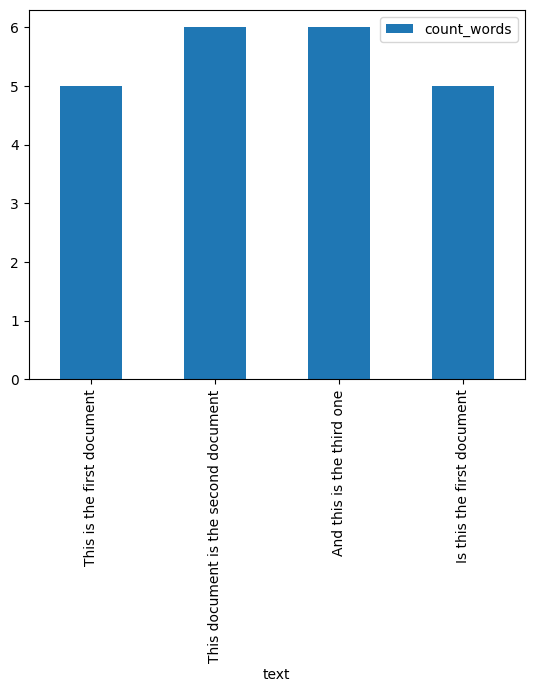

In [71]:
# Bar plot
df2.plot.bar(x="text", y="count_words")


### Scikit-Learn: Understanding CountVectorizer

The CountVectorizer is specifically used for counting words. The vectorizer part of CountVectorizer is (technically speaking!) the process of converting text into some sort of number-y thing that computers can understand.

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

# Build the text
text = """The CountVectorizer is specifically used for counting words.
The vectorizer part of CountVectorizer is (technically speaking!) the process of converting text into some sort of number-y
thing that computers can understand."""

vectorizer = CountVectorizer()

matrix = vectorizer.fit_transform([text])
matrix


<1x25 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [97]:
matrix.toarray()


array([[1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
        1, 1, 1]])

In [98]:
print(vectorizer.get_feature_names())


['can', 'computers', 'converting', 'counting', 'countvectorizer', 'for', 'into', 'is', 'number', 'of', 'part', 'process', 'some', 'sort', 'speaking', 'specifically', 'technically', 'text', 'that', 'the', 'thing', 'understand', 'used', 'vectorizer', 'words']


In [99]:
counts = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())


In [100]:
counts


,can,computers,converting,counting,countvectorizer,for,into,is,number,of,...,specifically,technically,text,that,the,thing,understand,used,vectorizer,words
0,1,1,1,1,2,1,1,2,1,3,...,1,1,1,1,3,1,1,1,1,1


In [102]:
# Sort the DF and show the top 10 most common words
counts.T.sort_values(by=0, ascending=False).head(10)


,0
the,3
of,3
countvectorizer,2
is,2
can,1
speaking,1
vectorizer,1
used,1
understand,1
thing,1


In [72]:
import requests

# Download the book
response = requests.get("http://www.gutenberg.org/cache/epub/42671/pg42671.txt")
text = response.text

# Look at some text in the middle
print(text[4101:4600])


 to be any thing extraordinary now. When a woman has
five grown up daughters, she ought to give over thinking of her own
beauty."

"In such cases, a woman has not often much beauty to think of."

"But, my dear, you must indeed go and see Mr. Bingley when he comes into
the neighbourhood."

"It is more than I engage for, I assure you."

"But consider your daughters. Only think what an establishment it would
be for one of them. Sir William and Lady Lucas are determined to go,
merely o


In [105]:
# How often have the words "love" and "hate" been used in the book?
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform([text])
counts = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())


In [106]:
counts = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
counts
print(counts["love"])
print(counts["hate"])


0    92
Name: love, dtype: int64
0    9
Name: hate, dtype: int64
